# Notebook for the development of script to automatically download seismic traces from IRIS and plot

In [1]:
stat = 'AAM' # Station Code
net = 'US' # Station Network
ch = ['BHZ','BH1','BH2'] # Channel
loc = '00' # Location 
# These 4 parameter identify the trace to download

In [5]:
import obspy

from obspy.core import UTCDateTime
from obspy import read
from obspy.clients.iris import Client
#use fdsn
#Reformatted to collate all imports together

In [4]:
start = UTCDateTime("2017-09-19T18:14:38")
end = UTCDateTime( start + 1800)
client = Client() # Not sure what this does but its gets rid of the "self" error message
AAM = obspy.core.stream.Stream()
for x in range(0,3):
 AAM += client.timeseries(network=net,station=stat,channel=ch[x],location=loc,starttime=start,endtime=end) 
#get_waveforms
#st = client.get_waveforms("IU","CCM","00","BH?")

In [ ]:
AAM[0].stats

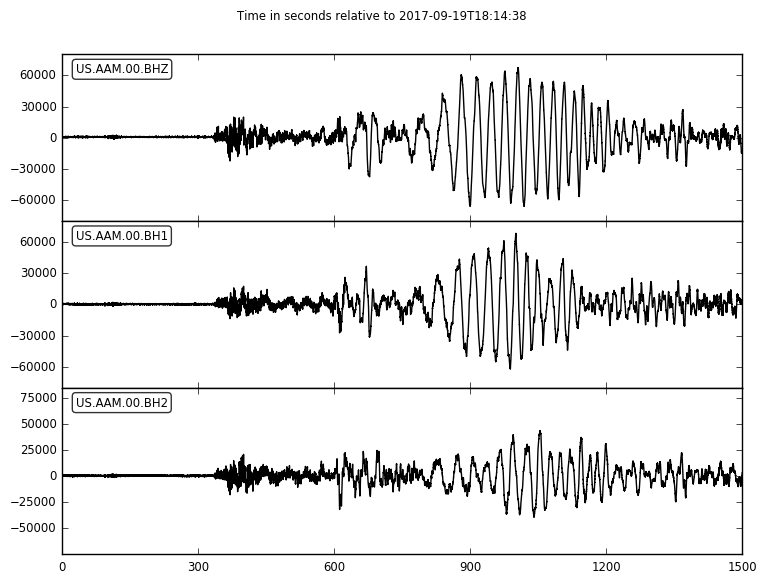

In [5]:
start_plot = start
end_plot = start_plot + 1500
AAM.plot(size = [800,600],starttime = start_plot,endtime = end_plot, type = 'relative')

## Now Lets look for splitting. Events need to be 4.0 < M_w < 7.3 and 95< d < 145

In [6]:
# Lets try using the 2010 Vanuatu 6.1 Event. Which occured at 2010-12-29 06:54:19. Turns out this event is too old
#to load so we will try another more recent event which occured S of Papa New Ginuea at 2017-09-25 20:29:23
# First we need to check the epicentral distance. This can be done in the TauP module of Obspy
lat_AAM = 42.301 # Latitude of Station AAM (deg)
long_AAM = -83.657 # Longitude of Station AAM (deg)
r = 6371 
## For now the required event information has been copied from the NEIC Online Catalog Search. This will need improving.
lat_e = -6.211 # Latitude of Event (deg)
long_e = 152.713 # Longitude of Event (deg)

In [7]:
# Now lets use this as an opportunity to practise if statements in Python 
d = obspy.taup.taup_geo.calc_dist(lat_e, long_e,lat_AAM,long_AAM,r,0) # Epicentral Distance

if  95 <= d and d < 145:
        print('Event is good')

else:
        print('Event is no good')

Event is good


In [8]:
# Lets plot traveltimes to determine the window we should be looking at on the seismogram
from obspy.taup import TauPyModel # This is how to intialise Taup. Ignore what it says in the tutorial!
model = TauPyModel(model="iasp91") # Creates a model class based on iasp91 

arrivals = model.get_travel_times(source_depth_in_km = 6.0, distance_in_degree = d, phase_list = ["Pdiff", "Sdiff", "SKS","SKKS","ScS"])
# We are interested in the phases SKS and SKKS
print(arrivals[0])

Pdiff phase arrival at 908.692 seconds


In [13]:
# Arrivals from the Papa New Guinea event are ~ 1500 - 2200 seconds AFTER the event occurs.
# Therefore we need the seismogram for this time 

origin = UTCDateTime("2017-09-25T20:29:23")
start = UTCDateTime(origin) # Start looking at the seismogram slightly beofre the event 
end = UTCDateTime( start + 2400) # This way we should be able to see all arrivals
client = Client() # Not sure what this does but its gets rid of the "self" error message
Str = obspy.core.stream.Stream()
for x in range(0,3):
 Str += client.timeseries(network='US',station='AAM',channel='BHZ',location='00',starttime=start,endtime=end) 

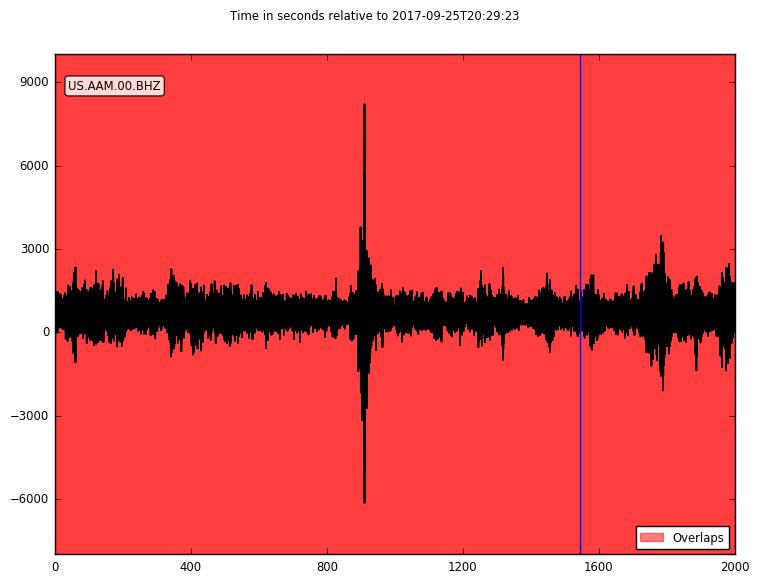

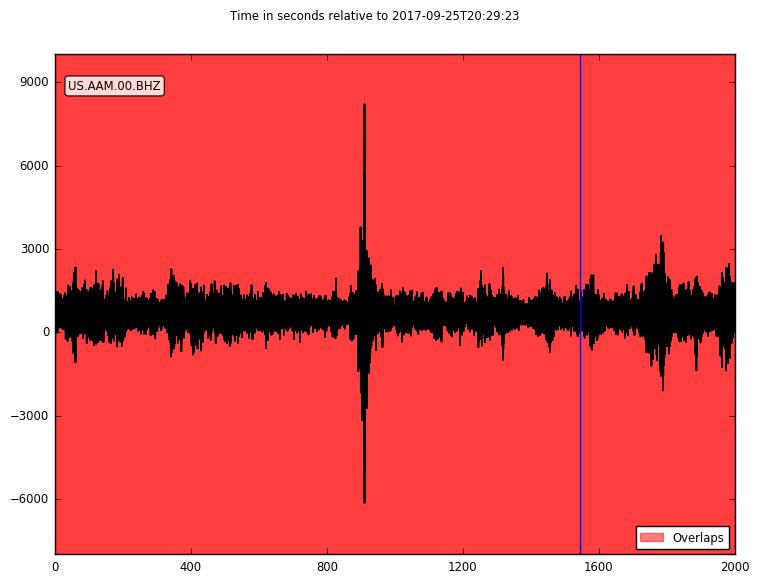

In [28]:
import matplotlib.pyplot as plt

# Now lets plot the seismograms 
start_plot = start 
end_plot = start_plot + 2000

# fig = plt.figure(1)
fig = Str.plot(size = [800,600],starttime = start_plot,endtime = end_plot, type = 'relative',handle=True)
axes = fig.axes

# ax2 = plt.subplot(211)
for ax in axes:
#     ax.plot([1543.454, 1543.454],[-6000, 9000],'-r')
    ax.axvline(x = 1543.454)
plt.show()

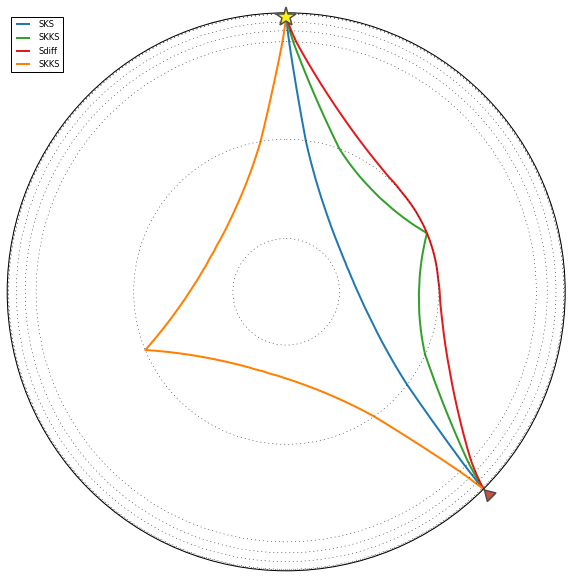

In [65]:
,# Lets plot the ray paths
# ray = obspy.taup.tau.Arrivals()
import matplotlib.pyplot as plt




ray = model.get_ray_paths(source_depth_in_km = 100, distance_in_degree = 135, phase_list = ["Sdiff","SKS","SKKS"])
ray1 = model.get_ray_paths(source_depth_in_km= 100, distance_in_degree= -70, phase_list=["S","ScS"])

fig = ray.plot(plot_type="spherical",label_arrivals=False )
axes = fig.axes


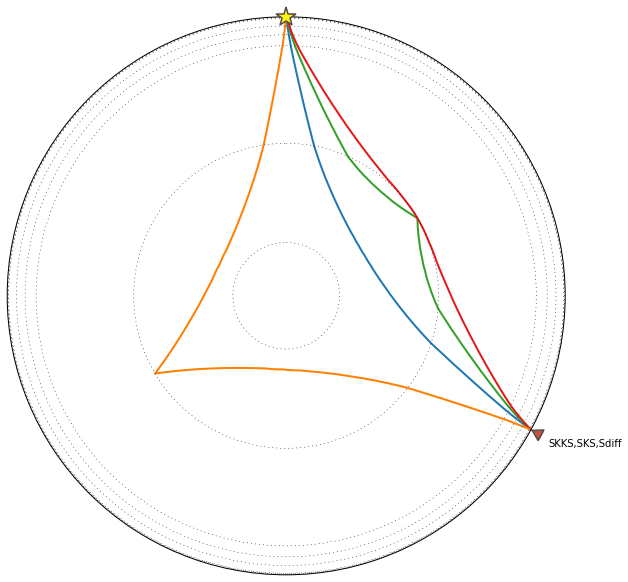

In [25]:
ray.plot(label_arrivals=True, legend = False)

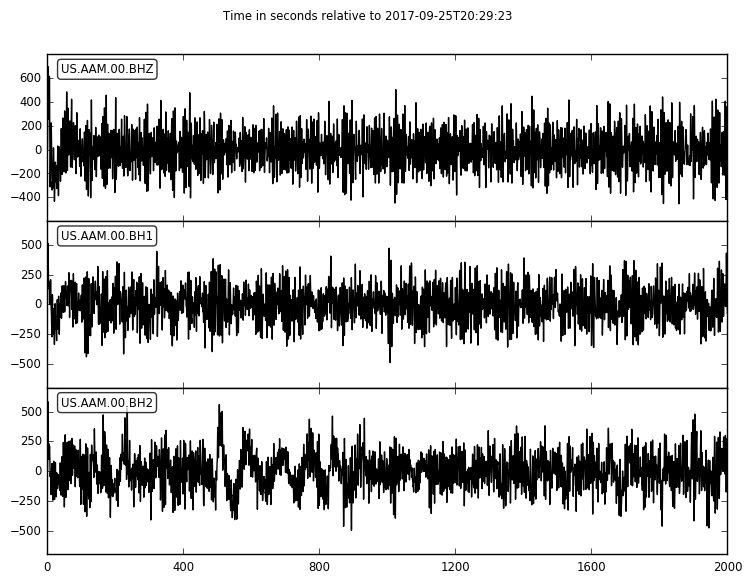

In [16]:
#Now lets filter the traces
Str_filter = Str.filter('bandpass', freqmin = 0.01, freqmax = 0.5)
Str_filter.plot(size = [800,600],starttime = start_plot,endtime = end_plot, type = 'relative')